In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from langdetect import detect
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [102]:
#Leer el archivo parquet que sale del preprocess.py
path = '/export/usuarios_ml4ds/lbartolome/NextProcurement/data/processed_10_abr/trf_lote_es.parquet'
df_preprocesado = pd.read_parquet(path)

# Función para detectar idiomas

In [ ]:
# Función para detectar el lenguaje con langdetect
def detect_lang(x: str) -> str:
    try:
        lang = detect(x)
        print(lang)
    except:
        lang = 'Other'
    return lang

# Cargando modelo tópicos

In [105]:
# Cargar descripciones de tópicos, es la salida del modelo LDA
#tpc_descriptions_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_descriptions.txt"
#tpc_descriptions = pd.read_csv(tpc_descriptions_path, header=None, names=['description'])

# Cargar etiquetas de tópicos
#tpc_labels_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_labels.txt"
#tpc_labels = pd.read_csv(tpc_labels_path, header=None, names=['label'])

# Cargar embeddings de tópicos, ahora mismo no son necesarias
#tpc_embeddings_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_embeddings.npy"
#tpc_embeddings = np.load(tpc_embeddings_path, allow_pickle=True)

# Cargando el corpus

In [108]:
# Cargar el corpus
#corpus_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/train_data/corpus.txt"
#corpus_df = pd.read_csv(corpus_path, header=None, names=['description'], index_col=False)

In [109]:
#corpus_df

In [110]:
def quitar_prefijo(texto):
    
    patron = r'^\d+\t\d+\t'
    texto_modificado = re.sub(patron, '', texto)
    
    return texto_modificado

In [111]:
#corpus_df['description'] = corpus_df['description'].apply(quitar_prefijo)

In [112]:
#pd.set_option('max_colwidth', None)

In [113]:
#corpus_df

In [114]:
'''
def generar_dataframe_desde_txt(vocab_path):
    # Inicializar listas para almacenar los componentes separados
    palabras = []
    freqs = []

    # Abrir el archivo para lectura
    with open(vocab_path, 'r', encoding='utf-8') as archivo:
        # Iterar sobre cada línea del archivo
        for linea in archivo:
            # Dividir la línea por el tabulador
            partes = linea.strip().split('\t')
            # Asegurar que la línea tiene exactamente dos partes
            if len(partes) == 2:
                palabra, freq = partes
                palabras.append(palabra)
                freqs.append(int(freq)) 

    # Crear un df con las listas de palabras y frecuencias
    df = pd.DataFrame({
        'palabra': palabras,
        'freq': freqs
    })

    return df
'''

"\ndef generar_dataframe_desde_txt(vocab_path):\n    # Inicializar listas para almacenar los componentes separados\n    palabras = []\n    freqs = []\n\n    # Abrir el archivo para lectura\n    with open(vocab_path, 'r', encoding='utf-8') as archivo:\n        # Iterar sobre cada línea del archivo\n        for linea in archivo:\n            # Dividir la línea por el tabulador\n            partes = linea.strip().split('\t')\n            # Asegurar que la línea tiene exactamente dos partes\n            if len(partes) == 2:\n                palabra, freq = partes\n                palabras.append(palabra)\n                freqs.append(int(freq)) \n\n    # Crear un df con las listas de palabras y frecuencias\n    df = pd.DataFrame({\n        'palabra': palabras,\n        'freq': freqs\n    })\n\n    return df\n"

In [115]:
#vocab_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/vocab_freq.txt"
#df = generar_dataframe_desde_txt(vocab_path)
#df_ordenado = df.sort_values(by='freq', ascending=False).reset_index(drop=True)

In [116]:
#vocab = pd.read_csv(vocab_path, header=None,index_col=False)

In [117]:
#df_ordenado.to_csv('palabras_con_freq.csv',index = False)

# Sacando stopwords TF-IDF

In [3]:
#Leer el archivo parquet que sale del preprocess.py
#path = "/export/usuarios_ml4ds/lbartolome/Repos/repos_con_carlos/RAG_tool/data/out/optimized/3.equivalence_detection/datos_modelo_es_Mallet_df_merged_14_topics_45_ENTREGABLE/aux_topic_model_tm_1/MalletLda_100/datos_modelo_es_Mallet_df_merged_14_topics_45_ENTREGABLE_embeddings_preproc.parquet"
path = "/export/usuarios_ml4ds/lbartolome/Repos/repos_con_carlos/RAG_tool/data/scholar/optimized/3.equivalence_detection/S2_Kwds3_AI_with_text_30000_both/aux_topic_model_tm_1/MalletLda_100/S2_Kwds3_AI_with_text_30000_both_embeddings_preproc.parquet"

df_preprocesado = pd.read_parquet(path)

In [4]:
df_preprocesado

,id_tm,raw_text,lemmas,embeddings,n_tokens
0,0,Machine learning in automated text categorizat...,machine learn automated categorization categor...,-0.065575786 0.029345222 -0.0017416258 -0.0789...,62
1,1,Bayesian Random-effect Model for Predicting Ou...,bayesian random model predict outcome summary ...,0.113414586 0.17952716 0.20194308 0.090767406 ...,89
2,2,ONTOLOGY BASED MEANINGFUL SEARCH USING SEMANTI...,ontology base meaningful search semantic natur...,-0.0609738 -0.08996825 0.04268345 0.032514263 ...,72
3,3,Natural Object Recognition: A Theoretical Fram...,natural object recognition theoretical framewo...,0.073607184 0.09557261 0.32074997 0.067074604 ...,145
4,4,Exploiting affinity propagation for automatic ...,exploit automatic acquisition domain concept o...,0.06858169 0.01559001 0.09521256 0.056243755 -...,68
...,...,...,...,...,...
29995,29995,Predictive modeling of antibiotic eradication ...,predictive modeling success pulmonary lead pat...,0.08745426 0.13751025 0.097161 0.0035809323 0....,138
29996,29996,Prediction of the conjugate depth of the hydra...,prediction conjugate depth random_forest regre...,-0.07819028 -0.012498996 0.061893776 -0.261943...,50
29997,29997,Image-Based Plant Disease Detection by Compari...,image base plant_disease detection deep learni...,0.266368 0.08303489 0.1532432 0.06550521 0.209...,86
29998,29998,A replica exchange preconditioned Crank-Nicols...,method bayesian markov_chain monte_carlo metho...,-0.016483396 0.23150568 0.14945446 0.11363491 ...,120


In [25]:
def get_filtered_words(text, percentage_below_mean=0.2):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_

    mean_idf = np.mean(idf_values)
    threshold = mean_idf * (1 - percentage_below_mean)

    print(f"Media IDF: {mean_idf}")
    print(f"Umbral ({(1 - percentage_below_mean)*100}% de la media): {threshold}")

    low_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf <= threshold]
    high_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf > threshold]

    return low_importance_words, high_importance_words, feature_names, idf_values

In [13]:
#Sirve para analizar el idf de las palabras
def get_idf_values(text):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_
    return feature_names, idf_values

#Sirve para sacar que palabras son las más repetidas
def get_tf_values(text):
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(text)
    total_word_counts = word_counts.sum(axis=0)
    # Obtener los nombres de las palabras
    feature_names = vectorizer.get_feature_names_out()
    
    # Convertir las frecuencias de término a un array de numpy
    tf_values = total_word_counts.A1
 
    # Ordenar las palabras por frecuencia de término
    sorted_tf_indices = np.argsort(tf_values)[::-1]
    sorted_words = feature_names[sorted_tf_indices]
    sorted_tf_values = tf_values[sorted_tf_indices]
    
    # Crear listas de las palabras y sus frecuencias ordenadas
    sorted_word_frequency = [(word, freq) for word, freq in zip(sorted_words, sorted_tf_values)]
    
    # Retornar la lista de palabras y frecuencias ordenadas
    return sorted_word_frequency

In [15]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 24,

    # Axes
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 24,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
})

In [16]:
#Graficando los valores de idf para escoger el threshold
text = df_preprocesado['lemmas']
print(text)

0        machine learn automated categorization categor...
1        bayesian random model predict outcome summary ...
2        ontology base meaningful search semantic natur...
3        natural object recognition theoretical framewo...
4        exploit automatic acquisition domain concept o...
                               ...                        
29995    predictive modeling success pulmonary lead pat...
29996    prediction conjugate depth random_forest regre...
29997    image base plant_disease detection deep learni...
29998    method bayesian markov_chain monte_carlo metho...
29999    path_planning base improve adaptive genetic_al...
Name: lemmas, Length: 28977, dtype: object


In [17]:
feature_names, idf_values = get_idf_values(text)
print(feature_names, idf_values)

['aaai' 'abandon' 'abbreviate' ... 'ﬁne_tune' 'ﬁnite' 'ﬁrst'] [8.566242   8.63523487 8.78938555 ... 8.87639693 8.70934284 7.11540912]


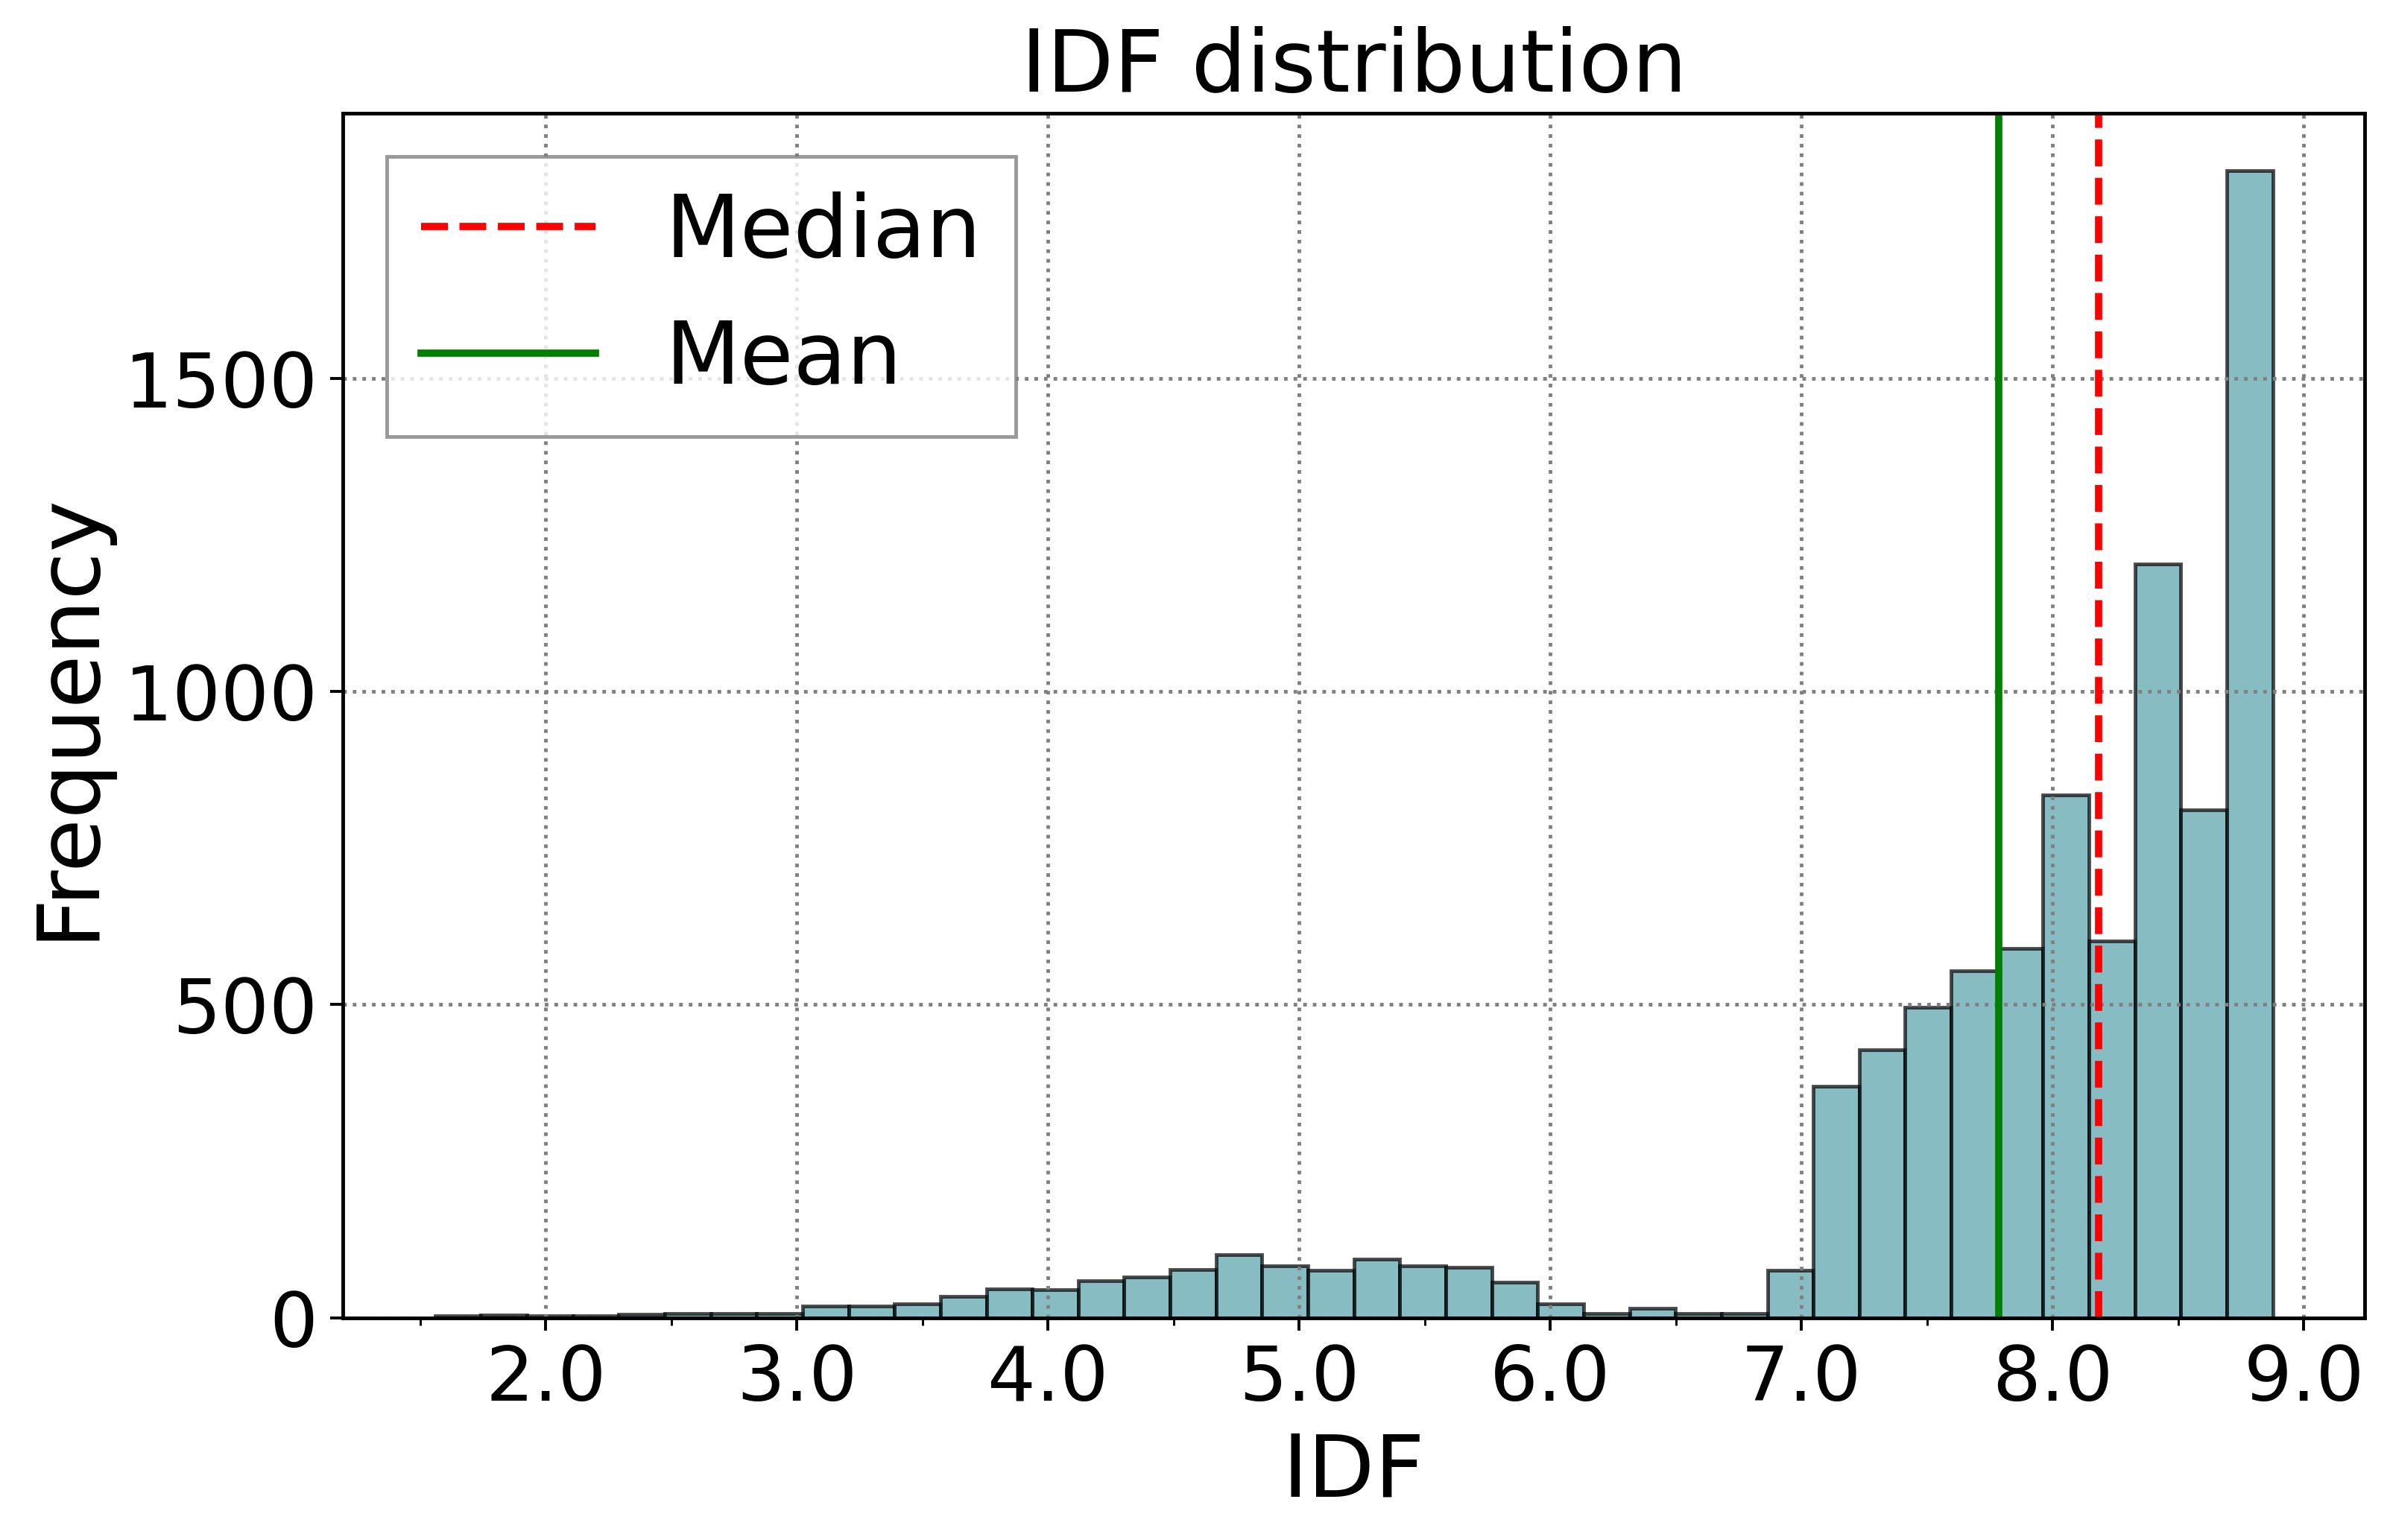

In [18]:
# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='#55a2a8', edgecolor='black', alpha=0.7)
plt.title('IDF distribution')
plt.xlabel('IDF')
plt.ylabel('Frequency')

# Set x-axis ticks to show every second value
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1.0))  # Set every tick at an interval of 1
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))  # Optional: add minor ticks at 0.5 intervals
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format the ticks

# Add vertical lines for median and mean
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Median')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Mean')

# Display the legend
plt.legend()

# Save the figure
plt.savefig("hist_idf_scholar.png")

# Show the plot
plt.show()

In [19]:
plt.savefig("hist_idf_scholar.png")

<Figure size 2415x1225 with 0 Axes>

In [20]:
sorted_word_frequency = get_tf_values(text)
for word, freq in sorted_word_frequency[:100]:  
    print(f"{word}: {freq}")

model: 46509
base: 34597
method: 32322
learning: 30784
machine: 26837
algorithm: 26806
technology: 24189
learn: 22356
propose: 21283
network: 18683
approach: 16931
paper: 16188
image: 15731
classification: 14221
feature: 13853
performance: 13770
study: 13401
deep: 12973
technique: 11710
analysis: 11536
accuracy: 11138
application: 10936
process: 10551
improve: 9346
task: 9194
design: 9084
prediction: 9082
time: 9074
dataset: 8348
develop: 8118
training: 8118
neural_network: 7946
detection: 7535
genetic_algorithm: 7146
recognition: 6998
result: 6716
control: 6409
train: 6290
include: 6248
human: 6235
knowledge: 6234
support_vector: 6188
user: 6148
predict: 6145
classifier: 6095
parameter: 6037
data: 5987
artificial_intelligence: 5941
achieve: 5804
level: 5649
perform: 5614
optimization: 5538
framework: 5474
identify: 5325
structure: 5202
field: 5125
processing: 4941
function: 4939
generate: 4937
decision: 4925
increase: 4823
development: 4762
experiment: 4651
evaluate: 4643
expert: 4516

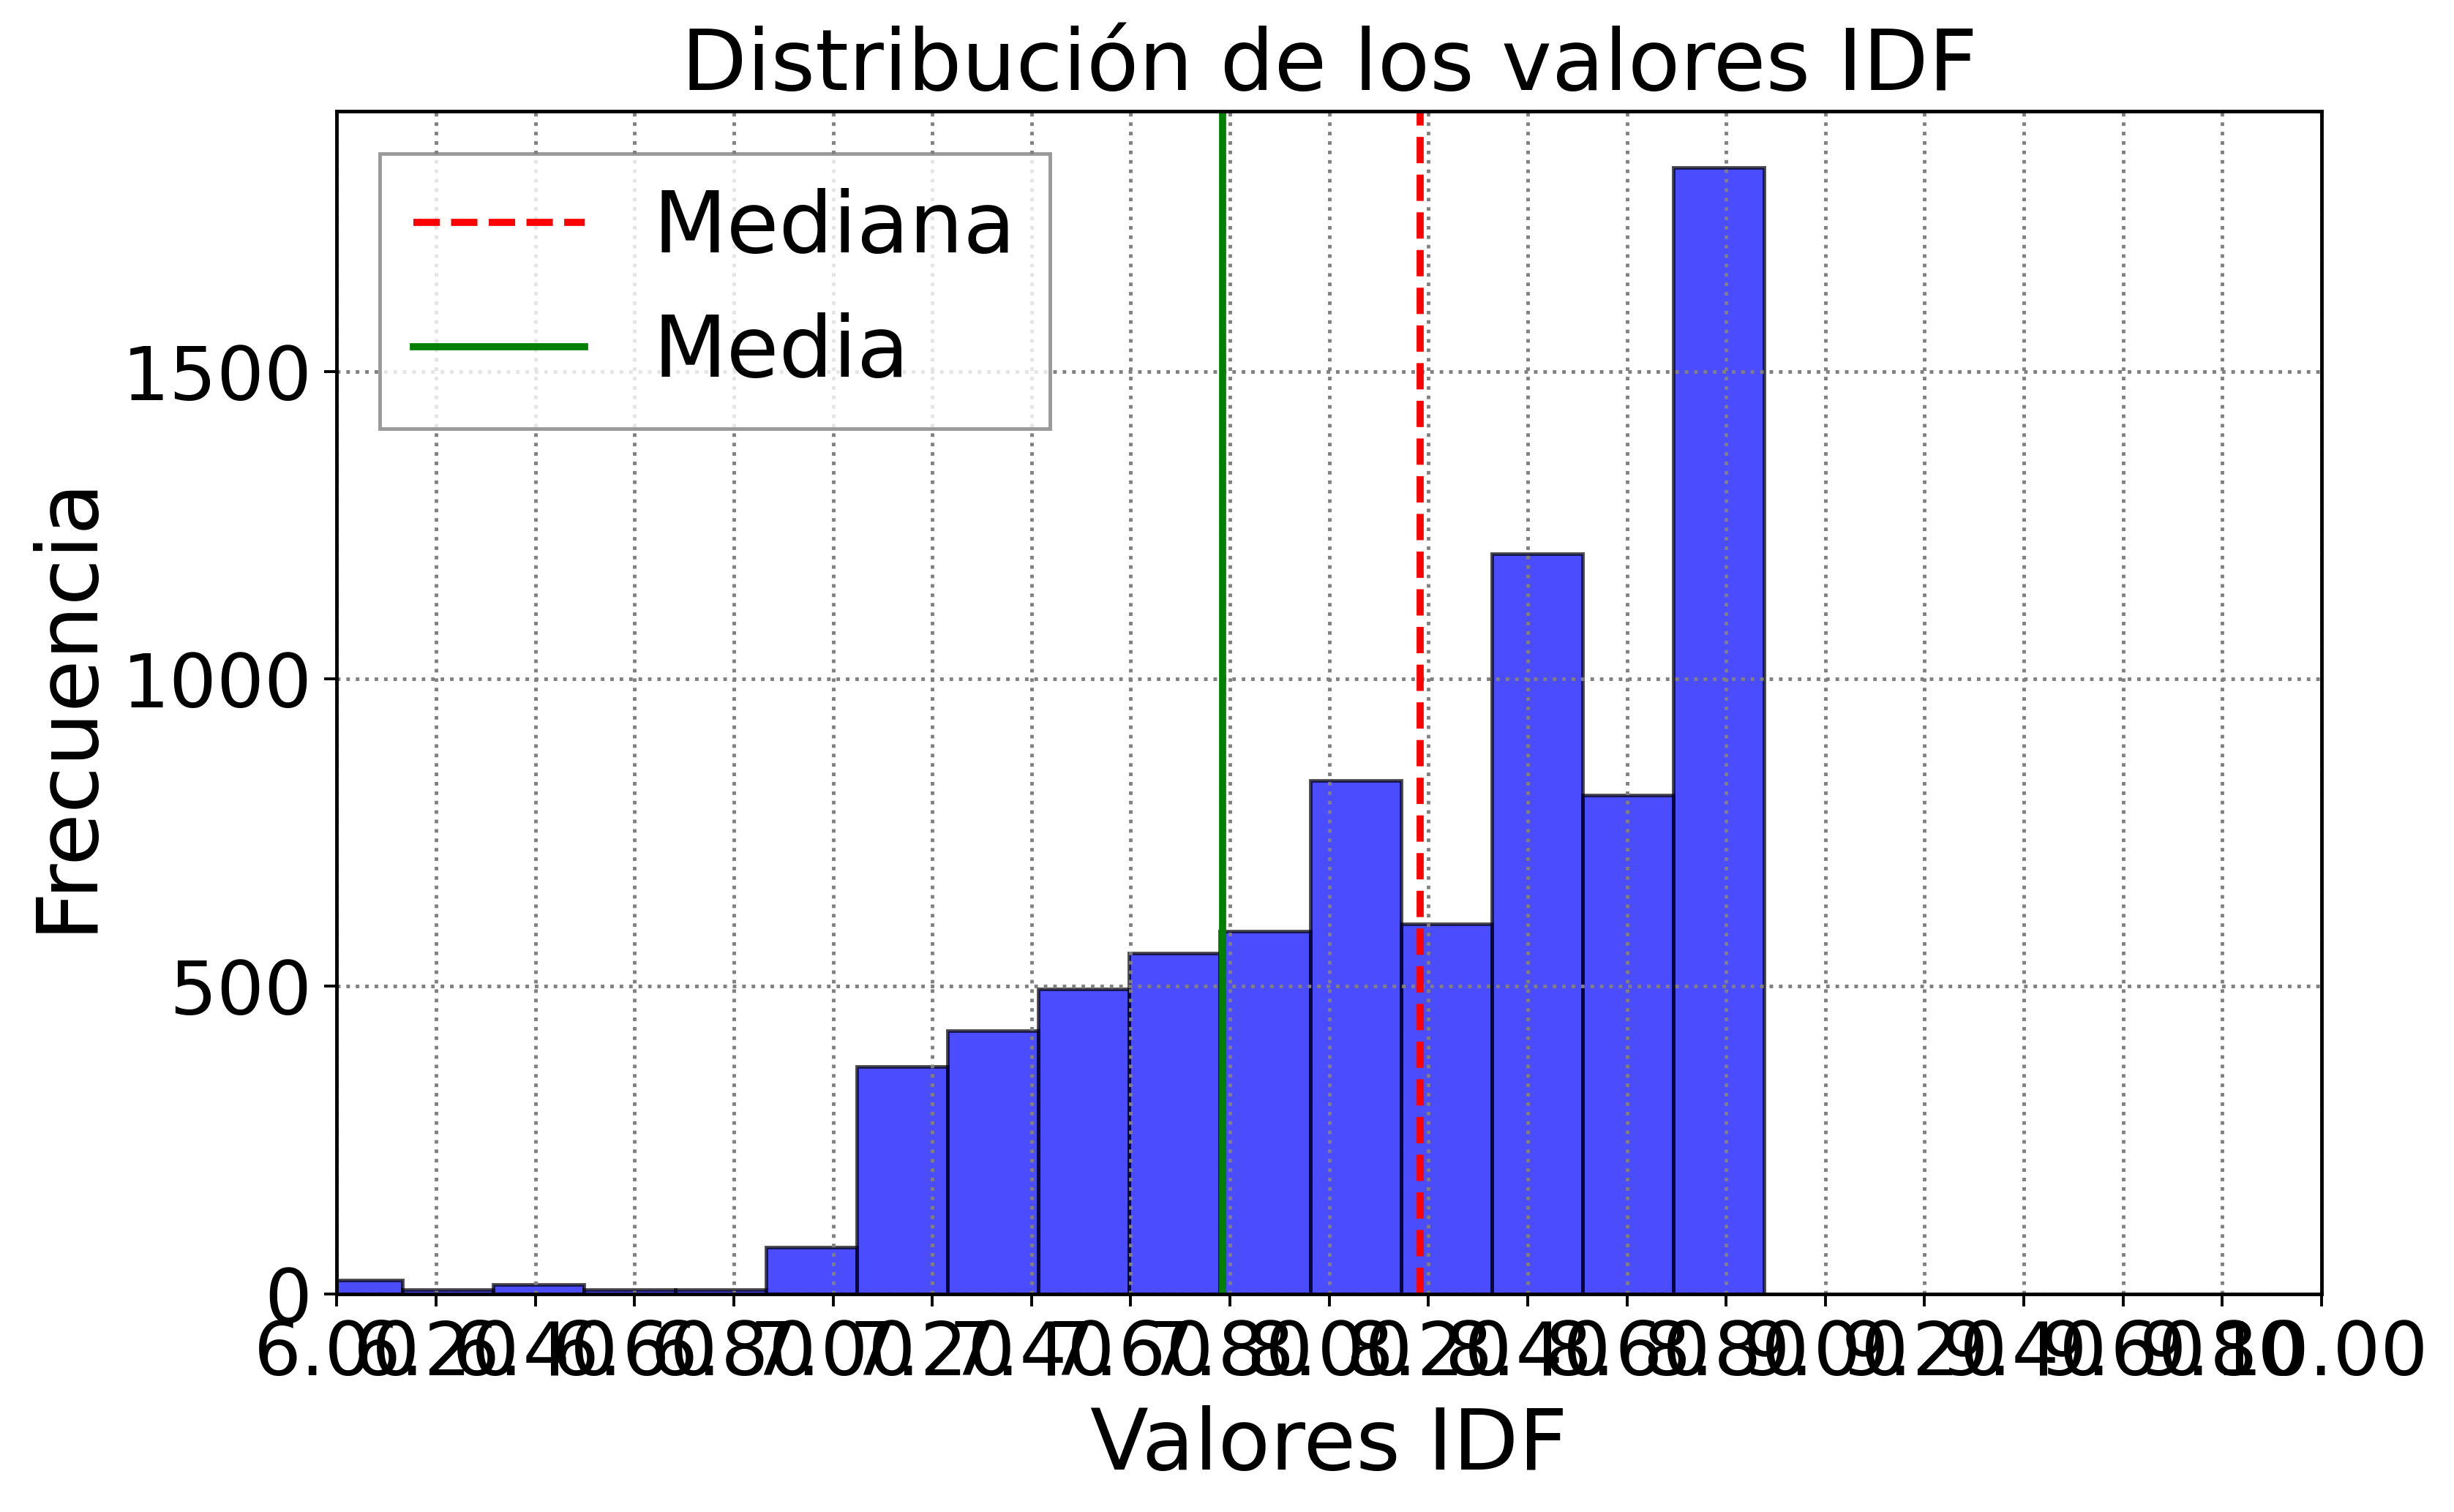

In [21]:
# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores IDF')
plt.xlabel('Valores IDF')
plt.ylabel('Frecuencia')

# Ajustar las marcas y el formato del eje X para el zoom
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  # intervalos más finos en el eje X
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))  # dos decimales de precisión

# Ajusta los límites del eje X para hacer zoom en los valores mayores que 8.0
plt.xlim(6, 10)
# Líneas de la mediana y la media
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Mediana')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Media')
plt.legend()
plt.show()

In [26]:
text = df_preprocesado['lemmas']  
# Calcular palabras de baja y alta importancia
low_importance, high_importance, palabras, idf_values = get_filtered_words(text, percentage_below_mean=0.2)

Media IDF: 7.784713947547931
Umbral (80.0% de la media): 6.227771158038345


In [49]:
lista_palabras = [str(elemento) for elemento in palabras.tolist()]

In [27]:
print(len(high_importance))
print(len(low_importance))

7822
1024


In [82]:
# Ruta al archivo de stopwords manual, añadir 
stopwords_file_path = '/export/usuarios_ml4ds/lbartolome/Repos/repos_con_carlos/RAG_tool/data/scholar/optimized/stops_txt/tf_idf.txt'

# Escribir las palabras de baja importancia al archivo de stopwords, añadiendo nuevas líneas
try:
    with open(stopwords_file_path, 'w') as file:
        for word in low_importance:
            file.write(word + '\n')
    print("Palabras de baja importancia añadidas exitosamente al archivo.")
except IOError:
    print("Error: No se pudo abrir o escribir en el archivo.")

Palabras de baja importancia añadidas exitosamente al archivo.


In [152]:
# Ruta al archivo .txt
archivo_txt = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/tf_idf.txt'

# Leer el archivo .txt utilizando pandas
try:
    datos = pd.read_csv(archivo_txt, sep='\t', header=None)  
    print("Archivo leído correctamente:")
    print(datos)
except FileNotFoundError:
    print("Error: Archivo no encontrado.")
except pd.errors.ParserError:
    print("Error: No se pudo interpretar el archivo correctamente.")

Archivo leído correctamente:
                        0
0                 obimace
1                 agüimes
2       recreativas_excmo
3                olivares
4                 chaccac
..                    ...
377     contracte_técnico
378    posterior_direcció
379             obres_ram
380  projecte_constructiu
381                bienal

[382 rows x 1 columns]


In [162]:
lista_palabras = [str(elemento) for elemento in palabras.tolist()]

In [172]:
def filtrar_palabras(lista_palabras, df_lista_datos, dict=False):
    """
    Filtra las palabras en un DataFrame o diccionario según una lista de palabras permitidas.

    Parámetros:
    - lista_palabras: list, lista de palabras permitidas.
    - df_lista_datos: pd.DataFrame o dict, DataFrame o diccionario que contiene las palabras a filtrar.
    - dict: bool, si es True, se asume que df_lista_datos es un diccionario.

    Retorna:
    - list, lista de palabras filtradas que están presentes tanto en el DataFrame o diccionario como en lista_palabras.
    - Si dict es True, retorna un diccionario filtrado en lugar de una lista.
    """
    if dict:
        # Asumimos que df_lista_datos es un diccionario y filtramos por las claves
        claves_filtradas = {clave: valor for clave, valor in df_lista_datos.items() if clave in lista_palabras}
        return claves_filtradas
    else:
        # Asumimos que df_lista_datos es un DataFrame y trabajamos con la primera columna
        lista_datos = df_lista_datos.iloc[:, 0].tolist()
        palabras_filtradas = [palabra for palabra in lista_datos if palabra in lista_palabras]
        return palabras_filtradas

In [160]:
# Llamada a la función
resultado_filtrado = filtrar_palabras(lista_palabras, datos)
print("Palabras filtradas:", resultado_filtrado)

Palabras filtradas: ['obimace', 'agüimes', 'olivares', 'caiss', 'española_patentes', 'marcas', 'álava', 'impacto', 'finalidad', 'acompañamiento', 'real_decreto', 'bonete', 'peñascosa', 'masegoso', 'orden_pedido', 'fac', 'baños_encina', 'socovos', 'pozuelo', 'higueruela', 'albatana', 'alcalá_júcar', 'alatoz', 'bibliográfico', 'folleto', 'económica_financiera', 'exposición_temporal', 'roll_up', 'alhama', 'campillo', 'san_agustín', 'guadalix', 'servizos', 'organizado_jm', 'condado', 'bibliográfico_audiovisual', 'cenes_vega', 'san_antón', 'ossa', 'valdivia', 'educación_cultura', 'electricidad_periodo', 'vpo', 'subsecretaría_conselleria', 'acuartelamiento_guardia', 'obimace', 'inspección_periódico', 'subsanación_deficiencia', 'santa_brígida', 'camí', 'oca', 'acs', 'social_marina', 'grupo_presión', 'jesús', 'salón_acto', 'público_empleo', 'puente_genil', 'servicios_múltiples', 'subsecretaría_ministerio', 'avda', 'victoria_acentejo', 'redactado', 'española_patentes', 'honorario', 'valorado', 

In [161]:
len(resultado_filtrado)

250

In [165]:
# Ruta al archivo de stopwords manual, añadir 
file_path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/tf_idf.txt'

# Escribir las palabras de baja importancia al archivo de stopwords, añadiendo nuevas líneas
try:
    with open(file_path, 'w') as file:
        for word in resultado_filtrado:
            #file.write(word + '\n')
    print("Palabras añadidas correctamente al archivo.")
except IOError:
    print("Error: No se pudo abrir o escribir en el archivo.")

Palabras añadidas correctamente al archivo.


In [168]:
# Ruta al archivo de stopwords manual, añadir 
archivo_txt = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/eq.txt'
# Leer el archivo .txt utilizando pandas
try:
    datos = pd.read_csv(archivo_txt, sep='\t', header=None)  
    print("Archivo leído correctamente:")
    print(datos)
except FileNotFoundError:
    print("Error: Archivo no encontrado.")
except pd.errors.ParserError:
    print("Error: No se pudo interpretar el archivo correctamente.")


Archivo leído correctamente:
                                                   0
0                    aparato_aire:aire_acondicionado
1    nacional_supercomputación:supercomputing_center
2                  laentidad_pública:entidad_pública
3                           urbanístico:urbanización
4                              inversiones:inversión
..                                               ...
493                                       niña:niños
494                          autonomía_clm:autonomía
495                                  sanchez:sánchez
496                                   premio:premios
497                                        menu:menú

[498 rows x 1 columns]


In [171]:
# Convertir la columna del DataFrame en una lista
lineas = datos.iloc[:, 0].tolist()

# Crear el diccionario dividiendo cada línea por el delimitador ':'
diccionario = {}

for linea in lineas:
    if linea:  # Verificar que la línea no esté vacía
        clave, valor = linea.split(':')
        diccionario[clave.strip()] = valor.strip()  # Eliminar espacios en blanco opcionales

print(diccionario)

{'aparato_aire': 'aire_acondicionado', 'nacional_supercomputación': 'supercomputing_center', 'laentidad_pública': 'entidad_pública', 'urbanístico': 'urbanización', 'inversiones': 'inversión', 'pgou': 'plan_general_ordenación_urbana', 'cma': 'certifiación_cma', 'pci': 'certificación_pci', 'hermanas': 'hermana', 'parques': 'parque', 'modificado': 'modifiación', 'urb': 'urbanización', 'pymes': 'pyme', 'políticas_sociales': 'política_social', 'investigaciones_oncológicas': 'investigación_oncológica', 'institut_cartogràfic': 'instituto_cartográfico', 'cartogràfic_geològic': 'institut_cartogràfic', 'computarizada': 'tomografía_axial_computarizada', 'topogràfica_escala': 'escala_topográfica', 'revisió_cartografia': 'revisión_cartográfica', 'radiodiagnóstico_ecografía': 'ecografía', 'radiodiagnóstico_resonancia': 'resonancia', 'axial_computarizada': 'tomografía_axial_computarizada', 'rtvc_tf': 'rtvc', 'magnética_nuclear': 'resonancia_magnética', 'resonancia_magnético': 'resonancia_magnética', 

In [174]:
resultado_filtrado = filtrar_palabras(lista_palabras, datos, dict=True)
print("Palabras filtradas:", resultado_filtrado)

Palabras filtradas: {}


In [ ]:
'''
# Ruta donde se encuentran los archivos de stopwords
ruta_stopwords = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords'

# Cargar todas las stopwords desde los archivos
stopwords = set()
for archivo in os.listdir(ruta_stopwords):
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(ruta_stopwords, archivo)
        with open(ruta_completa, 'r', encoding='utf-8') as f:
            stopwords.update(f.read().splitlines())

# Vectorizar el proceso de eliminación de stopwords
def eliminar_stopwords(fila):
    return ' '.join([palabra for palabra in fila.split() if palabra not in stopwords])

# Aplicar la función de manera vectorizada
df_preprocesado['lemmas'] = df_preprocesado['lemmas'].apply(eliminar_stopwords)
'''

Antes de aplicar las stopwords

In [ ]:
df_preprocesado['lemmas'].iloc[200030]

Después de aplicar las stopwords

In [ ]:
df_preprocesado['lemmas'].iloc[200030]

In [ ]:
df_preprocesado

In [28]:
df = pd.read_parquet('/export/usuarios_ml4ds/cggamella/RAG_tool/data/out/optimized/1.acronym_detection_expansion/in_text_score_mas_0_65_y_slash_remove.parquet')
df

,objective,Acronyms Detected(LLM),Expansions,text_substituted,id_tm
0,El Pliego de Condiciones Particulares que nos ...,/,/,El Pliego de Condiciones Particulares que nos ...,0
1,Constituye el objeto de este documento estable...,/,/,Constituye el objeto de este documento estable...,1
2,El presente Pliego tiene por objeto recoger la...,tragsa,"Empresa de Transformación Agraria, S.A.",El presente Pliego tiene por objeto recoger la...,2
3,calibración de los equipos y su soporte lógico...,aemps,Agencia Española de Medicamentos y Productos S...,calibración de los equipos y su soporte lógico...,3
4,El objeto del presente contrato es la contrata...,/,/,El objeto del presente contrato es la contrata...,4
...,...,...,...,...,...
175884,Definir las características de una calculadora...,/,/,Definir las características de una calculadora...,175884
175885,El objeto del presente contrato es el servicio...,/,/,El objeto del presente contrato es el servicio...,175885
175886,El objeto del presente pliego de prescripcione...,/,/,El objeto del presente pliego de prescripcione...,175886
175887,El objetivo último de los documentos del proye...,/,/,El objetivo último de los documentos del proye...,175887


In [30]:
df = df.head(10000)
df

,objective,Acronyms Detected(LLM),Expansions,text_substituted,id_tm
0,El Pliego de Condiciones Particulares que nos ...,/,/,El Pliego de Condiciones Particulares que nos ...,0
1,Constituye el objeto de este documento estable...,/,/,Constituye el objeto de este documento estable...,1
2,El presente Pliego tiene por objeto recoger la...,tragsa,"Empresa de Transformación Agraria, S.A.",El presente Pliego tiene por objeto recoger la...,2
3,calibración de los equipos y su soporte lógico...,aemps,Agencia Española de Medicamentos y Productos S...,calibración de los equipos y su soporte lógico...,3
4,El objeto del presente contrato es la contrata...,/,/,El objeto del presente contrato es la contrata...,4
...,...,...,...,...,...
9995,El Museo Nacional Thyssen-Bornemisza desarroll...,/,/,El Museo Nacional Thyssen-Bornemisza desarroll...,9995
9996,"Realización de las visitas, pruebas y reconoci...",/,/,"Realización de las visitas, pruebas y reconoci...",9996
9997,El objeto del presente pliego es determinar el...,/,/,El objeto del presente pliego es determinar el...,9997
9998,El objeto del presente pliego es la ordenación...,/,/,El objeto del presente pliego es la ordenación...,9998


In [31]:
df.to_parquet('/export/usuarios_ml4ds/cggamella/RAG_tool/data/integracion_STOPS/in_text_score_mas_0_65_y_slash_remove_1000.parquet')